In [1]:
import numpy as np
np.random.seed(5)

from keras.layers import Input, Dense, SimpleRNN
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical

from keras import backend as K
import tensorflow as tf
from tensorflow import keras

In [2]:
# 1. LECTURA DEL SET DE DATOS
# ===========================================================
nombres = open("nombres_dinosaurios.txt","r").read()
nombres = nombres.lower()

# Crear diccionario (listado de caracteres que no se repiten)
alfabeto = list(set(nombres))
tam_datos, tam_alfabeto = len(nombres), len(alfabeto)
print("En total hay %d caracteres, y el diccionario tiene un tamaño de %d caracteres." % (tam_datos, tam_alfabeto))

# Conversión de caracteres a índices y viceversa
car_a_ind = { car:ind for ind,car in enumerate(sorted(alfabeto))}
ind_a_car = { ind:car for ind,car in enumerate(sorted(alfabeto))}
print(car_a_ind)
print(ind_a_car)

En total hay 19909 caracteres, y el diccionario tiene un tamaño de 27 caracteres.
{'\n': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
{0: '\n', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [3]:
nneuronas = 128
model = keras.models.Sequential([
    keras.layers.SimpleRNN(nneuronas,return_sequences=True,input_shape=(None,tam_alfabeto)),
    keras.layers.SimpleRNN(nneuronas, return_sequences=True),
    keras.layers.Dense(tam_alfabeto, activation="softmax")
])

model.compile(loss="categorical_crossentropy",optimizer="adam")
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 128)         19968     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 128)         32896     
                                                                 
 dense (Dense)               (None, None, 27)          3483      
                                                                 
Total params: 56347 (220.11 KB)
Trainable params: 56347 (220.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


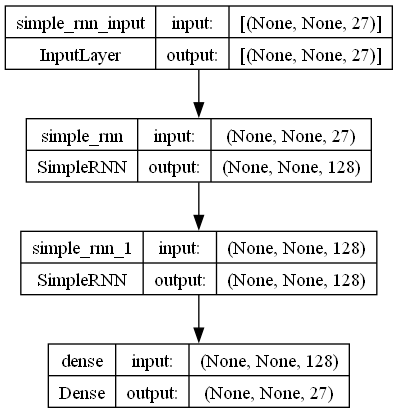

In [4]:
keras.utils.plot_model(model, "dino.png",show_shapes=True)

In [6]:
with open("nombres_dinosaurios.txt") as f:
      ejemplos = f.readlines()
ejemplos = [x.lower().strip() for x in ejemplos]

In [7]:
def genera_train():
    rx = []
    ry = []
    ejemplo = ejemplos[np.random.randint(0,len(ejemplos))]


In [11]:
def genera_train():
  rx = []
  ry = []
  ejemplo = ejemplos[np.random.randint(0, len(ejemplos))]
  X = [None] + [car_a_ind[c] for c in ejemplo]
  Y = X[1:] + [car_a_ind["\n"]]
  onehot = to_categorical(X[1:], tam_alfabeto)
  x = np.zeros((len(X), tam_alfabeto))
  x[1:] = onehot.astype("float32")
  y = to_categorical(Y, tam_alfabeto).reshape(len(X), tam_alfabeto)
  rx.append(x)
  ry.append(y)
  return np.array(rx), np.array(ry)

In [16]:
niters = 10000
for j in range(niters):
  rx, ry = genera_train()
  historia = model.train_on_batch(rx, ry)
  if j%10 == 0: print(f"Iter: {j} loss:{historia}")

Iter: 0 loss:1.4363439083099365
Iter: 10 loss:2.587494134902954
Iter: 20 loss:1.320662260055542
Iter: 30 loss:1.5226783752441406
Iter: 40 loss:1.359804391860962
Iter: 50 loss:1.4734721183776855
Iter: 60 loss:2.4568097591400146
Iter: 70 loss:1.8686003684997559
Iter: 80 loss:1.9005733728408813
Iter: 90 loss:1.6061792373657227
Iter: 100 loss:1.814860463142395
Iter: 110 loss:1.439238429069519
Iter: 120 loss:2.369567394256592
Iter: 130 loss:1.7082115411758423
Iter: 140 loss:1.770331621170044
Iter: 150 loss:1.9941890239715576
Iter: 160 loss:2.0535569190979004
Iter: 170 loss:1.3752226829528809
Iter: 180 loss:1.0446879863739014
Iter: 190 loss:2.6210062503814697
Iter: 200 loss:3.351461172103882
Iter: 210 loss:1.4443910121917725
Iter: 220 loss:1.726410150527954
Iter: 230 loss:1.5948458909988403
Iter: 240 loss:2.498825788497925
Iter: 250 loss:2.2820770740509033
Iter: 260 loss:1.5768979787826538
Iter: 270 loss:1.9525291919708252
Iter: 280 loss:2.3881566524505615
Iter: 290 loss:1.1276781558990479
I

In [17]:
def genera_nombre():
  x = np.zeros((1,1,tam_alfabeto))
  nombre = ""
  car = -1

  cont = 0
  while car != "\n" and cont != 30:
    pred = model.predict(x, verbose=0)
    ultimo = pred[0:, -1:, :]
    ix = np.random.choice(list(range(tam_alfabeto)), p=ultimo.ravel())
    car = ind_a_car[ix]
    nombre += car

    x1 = to_categorical(ix, tam_alfabeto)
    x = x.reshape(-1, 27)
    x1 = x1.reshape(-1, 27)
    x = np.append(x, x1)
    x = x.reshape(1, -1, 27)
    cont += 1
  print(nombre)

In [18]:
for i in range(20):
      genera_nombre()

nebasaurus

stegianosaurus

ornothaeniceratops

paglespoun

burtroropteryx

epaeperia

orwitacethaauphityk

olmagsaurus

gibmonekhamamusas

migriyaosaurut

tatamomus

niovhaurus

pasanangosaurus

colodon

ploconguanopasaurus

scolicephalus

murilnopuchenopelta

horgiantosaurus

surocenatosaurus

nesilasiuipus

